# Programming Assignment II: Explainability

In this assignment you will train machine learning models and experiment with techniques discussed in the lectures.
This assignment makes use of existing Python libraries for some questions. We have provided links to tutorials/examples if you're not familiar with them yet.

All code that you implement should be in this notebook. You should submit:
* This notebook with your code added. Make sure to add enough documentation. Also provide complete answers to the more theoretical questions in this notebook. These questions are followed by an 'answer indent':
> Answer:

The notebook .ipynb should have the name format `Prog_Explainability_Group_X.ipynb`, where X is your programming group ID.

Important notes:
* Deadline for this assignment is **Friday, May 30, 17:00**.
* Send it to both Maria Muratidi (m.mouratidi@uu.nl) and Heysem Kaya (h.kaya@uu.nl), CCing your programming partner.
* Title of the email: [INFOMHCML] Explainability programming assignment submission [X], with X the number of your group.
* There will be a lab session to assist you with the assignment on **Tuesday, May 27, between 11:00-12:45 at DALTON 500 - 6.27 and DALTON 500 - 8.27**.

### Installation

For this assignment, we are going to use the following Python packages:
graphviz, matplotlib, pandas, statsmodels, openpyxl, interpret, and scikit-learn.

In [2]:
# Installing packages
!pip install graphviz
!pip install matplotlib pandas statsmodels openpyxl
!pip install interpret
!pip install scikit-learn --upgrade

### Read the data
We are going to use the ChaLearn LAP-FI (First Impressions) Dataset. This dataset contains 10.000 data points, which correspond to videos collected from YouTube and annotated via Amazon Mechanical Turk for the BIG-5 personality impressions: openness, extraversion, conscientiousness, neuroticism, agreeableness.

These five personality impression scores will be used as features to predict the outcome variable: a job interview invitation.

For a detailed description, see the [paper of the dataset](https://ieeexplore.ieee.org/abstract/document/7966041?casa_token=1Y03H5ykCqsAAAAA:VLhCcjAgByJ2hTdKhulmIUiXIVepEJfFyB7HM0XVts7bN8Gi8wMsiTT0qZ--I_kq8wiUHIpPN7es).


1.   If you use Google Colab, upload 'all_df.csv' (you can find this file on blackboard) through the upload button in the Files tab.
  - Copy the path of the file;
  - Run the cell below with your path. This will ask you for permission to access your Google Drive files and then you can access the data.
2.   If you are running this notebook at your own machine (jupyter notebook), locate the 'all_df.csv' file in the same folder this notebook exists. Then you can run the second cell below.

   



In [1]:
# Run this cell (both when working locally or with Google Colab)
import pandas as pd

data = pd.read_csv("all_df.csv")
print("Data loaded")

Data loaded


### Loading and preprocessing the data
There are 6000, 2000 and 2000 examples for training, validation/development and test set respectively. In the data this is indicated by the feature `split`.

The training set is used to train models, the validation/development set to optimize the models hyper-parameters, and the test set to evaluate the trained model.

In [26]:
import numpy as np

# global variables
FEATURE_NAMES = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']
LABEL_NAME = 'interview'

def load_data():
    def split_feature_label(data_set):
        features = data_set[FEATURE_NAMES]
        labels = data_set[LABEL_NAME]
        return features, labels

    train_set = data[data['split'] == 'training']
    val_set = data[data['split'] == 'validation']
    test_set = data[data['split'] == 'test']

    train_features, train_labels = split_feature_label(train_set)
    val_features, val_labels = split_feature_label(val_set)
    test_features, test_labels = split_feature_label(test_set)

    return train_features, train_labels, val_features, \
        val_labels, test_features, test_labels

# Load the data with the function above
(train_features, train_labels, dev_features, \
        dev_labels, test_features, test_labels) = load_data()

# Part 1. Different models

### **1. Linear Regression**

Train a linear regression model (we recommend the `statsmodels.api` package with the ordinary least squares model `sm`).

Hint: to get a linear regression model, you should manually add a constant variable (usually called bias or intercept - that has a fixed value of 1 for all instances) to the data, either by adding it column yourself or by using the `add_constant()` function.



**Q1.1**

Provide the $R^2$ (goodness of fit) statistic and for each feature (+ the bias variable), the following in tabular format:
* Weight estimate (coef)
* SE (standard error of estimates)
* T-statistic

Hint: You can print the summary of the model using `.summary()` to do this. This gives an extensive overview of the performance of a model.

In [3]:
# We recommend the statsmodels package
import statsmodels.api as sm

# Your code to add a bias/intercept variable
bias = sm.add_constant(train_features)

# Train the model and print out the summary
model = sm.OLS(train_labels, bias).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              interview   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        17:39:37   Log-Likelihood:                 10232.
No. Observations:                6000   AIC:                        -2.045e+04
Df Residuals:                    5994   BIC:                        -2.041e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0727      0.00

**Q1.2**

Which three features are the most important?

> Answer: The Three most important features are (in order) conscientiousness, agreeableness and neuroticism. This is seen by ranking the absolute value of the t-value 

**Q1.3**

How does the predicted 'interview' score change with an 0.1 increase of the 'conscientiousness' feature given that all other feature values remain the same?

> Answer: if the 'conscientiousness' feature increase by an 0.1, the 'interview' score will increase by 0.03293 

**Q1.4**

Show bar graph illustrations of the feature effects for the first two validation set instances.

> Answer:

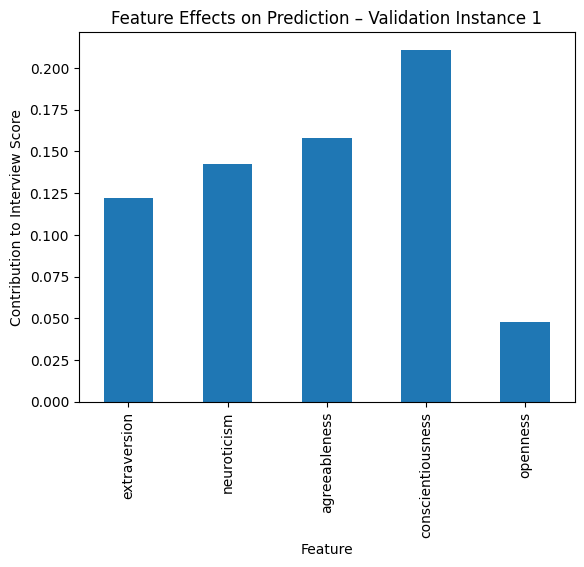

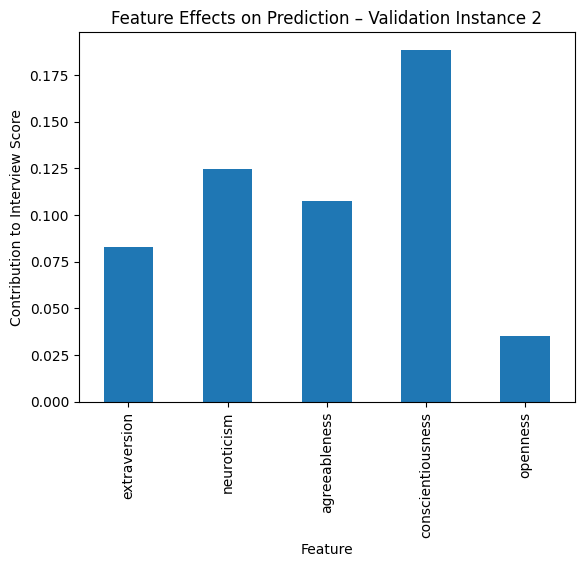

In [4]:
# Compute the Feature Effects

# Show bar graphs

import matplotlib.pyplot as plt
import statsmodels.api as sm

X_dev = sm.add_constant(dev_features)
coefficients = model.params  
instances = X_dev.iloc[:2]

contributions = instances * coefficients

# 5. Plot for each instance
for i in range(2):
    contrib = contributions.iloc[i]
    contrib_no_const = contrib.drop('const')  # remove intercept for clarity
    contrib_no_const.plot(kind='bar')
    plt.title(f'Feature Effects on Prediction – Validation Instance {i+1}')
    plt.ylabel('Contribution to Interview Score')
    plt.xlabel('Feature')
    plt.show()



**Q1.5**

Reflection: why would training a regression tree not work well for this dataset in terms of model interpretability? And under what conditions could the dataset be used with a decision tree to yield an interpretable model?

> **Answer:**  
they will split the dataset into many small regions with different rules, and this makes it hard to understand the overall relationship between each feature and the outcome, resulting in loss of global interpretability.

Decision tree would yield into an interpretable model under the conditions of:  
    - If the data has strong, nonlinear threshold effects  
    - If features are categorical  
    - If pruning is applied or limit tree depth

### **2. Explainable Boosting Model**
Train an Explainable Boosting Machine (EBM) with [InterpretML](https://interpret.ml/docs/ebm.html). EBM is a Generalized Additive Model (GAM) that is highly intelligible and explainable.

The `interpret` package provides both global and local explanation functions: `explain_global()` and `explain_local()` can be used to interpret a ML model.

**Q2.1**

Visualize/provide global (model-wise) feature importances for EBM as a table or figure.

In [5]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

# EBM Global feature importances
ebm = ExplainableBoostingRegressor(random_state=42)
ebm.fit(train_features, train_labels)
global_exp = ebm.explain_global()

show(global_exp)

<!-- http://127.0.0.1:7001/5336830976/ -->

**Q2.2**

What are the most important two features in EBM? Are they the same as in the linear model?

> Answer: The most two important features are conscientiouness and neuroticism.

Now, to have an idea how EBM treats the input and generates the explanation, visualize EBM local explanations on a synthetic instance generated from training set mean feature vector as input and training set mean response as output.



In [6]:
# EBM Local explanation for training set mean vector with corresponding training set mean label
train_mean_x = pd.DataFrame(train_features.mean(axis=0)).T
train_mean_y = pd.DataFrame([train_labels.mean()])

print(train_mean_x)
print(train_mean_y)

   extraversion  neuroticism  agreeableness  conscientiousness  openness
0      0.476146     0.520286       0.548181           0.522731  0.566281
         0
0  0.50378


**Q2.3**

Now, visualize local (instance-wise) feature importances for the first two instances of the development set.

In [7]:
# EBM local explanations for the first two development set instances
instances_to_explain = dev_features.iloc[:2]
local_exp = ebm.explain_local(instances_to_explain, y= None)  
show(local_exp)

<!-- http://127.0.0.1:7001/5565249536/ -->

**Q2.4**

Let's compare these feature importances with the feature effects in question 1.4.

* Are the feature contribution orderings the same in both models for the two instances?
> Answer:
 The ordering is not the same for the two instances.

- **First instance** feature contribution order:
  1. *Conscientiousness*
  2. *Extraversion*
  3. *Agreeableness*

- **Second instance** feature contribution order:
  1. *Agreeableness*
  2. *Conscientiousness*
  3. *Openness*

* For the second example's explanation, why do you think the contribution of *conscientiousness* is positive, while the contribution of *agreeableness* is negative? (Hint: consider the feature values relative to the training set mean values you calculated / processed in the former subquestion.)
> Answer:
We can **see** that the value of *conscientiousness* is **0.57**, which is higher than its average (**0.522731**). This results in a **positive contribution**.  
In the case of *agreeableness*, the value is **0.42**, which is lower than its mean (**0.548181**), resulting in a **negative contribution**.



# Part 2. Model-Agnostic Methods for Interpreting/Explaining NN

### **3. Training Neural Networks**
Train a one-layer Neural Network (multi-layer perceptron (MLP) Regressor, but with one layer) with the following settings:

- Activation function: ReLU
- Size of the hidden layer: 50 neurons
- Recommended optimizer/solver: Adam

For a tutorial see [Tutorial](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

**Q3.1**

Apply the trained neural network model to the development set to find the best hyperparameters (such as learning rate). Report the Root Mean Square Error (RMSE) performance measure.

**Note.** A development set RMSE below 0.045 is reasonable, then you can apply the corresponding model on the test set in the next question.

In [42]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Train the MLPRegressor and show RMSE on development set
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5] 
best_rmse = float('inf')
best_lr = None
best_model = None

for lr in learning_rates:
    model = MLPRegressor(hidden_layer_sizes=(50,),
                         activation='relu',
                         solver='adam', 
                         alpha=0.0001, 
                         batch_size=128,
                         learning_rate_init=lr,
                         max_iter=1000,
                         random_state=42)

    model.fit(train_features, train_labels)
    
    predictions = model.predict(dev_features)
    rmse = np.sqrt(mean_squared_error(dev_labels, predictions))
    print(f"Learning rate: {lr} - RMSE: {rmse:.4f}")
    
    # Track best model
    if rmse < best_rmse:
        best_rmse = rmse
        best_lr = lr
        best_model = model

print(f"\nBest learning rate: {best_lr} with RMSE: {best_rmse:.4f}")


Learning rate: 0.0001 - RMSE: 0.0513
Learning rate: 0.001 - RMSE: 0.0438
Learning rate: 0.01 - RMSE: 0.0433
Learning rate: 0.1 - RMSE: 0.0432
Learning rate: 0.2 - RMSE: 0.0441
Learning rate: 0.5 - RMSE: 0.1452

Best learning rate: 0.1 with RMSE: 0.0432


In [39]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#changing the names so we don't get confused 
X_train = train_features
y_train = train_labels
X_val   = dev_features
y_val   = dev_labels
X_test  = test_features
y_test  = test_labels

clf = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam', alpha=0.0001, batch_size=128, learning_rate_init=0.001)
clf.fit(X_train, y_train)

#predict the validation set
y_pred = clf.predict(X_val)

#evaluating:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE is {rmse}")

RMSE is 0.04334632114166996


**Q3.2**

Now use the best settings to report the Root Mean Square Error (RMSE) performance measure on the test set.

It is possible to use the combination of the training and development sets to retrain the model and report the test set performance. You can also use the model that was trained on the training set only.

In [30]:
# RMSE on test set
train_total = np.concatenate([train_features, dev_features])
train_total_labels = np.concatenate([train_labels, dev_labels])

train_total = pd.concat([train_features, dev_features], axis=0, ignore_index=True)
train_total_labels = pd.concat([train_labels, dev_labels], axis=0, ignore_index=True)

nn_model = MLPRegressor(hidden_layer_sizes=(50,),
                         activation='relu',
                         solver='adam',
                         learning_rate_init=0.1,
                         max_iter=500,
                         random_state=42)

nn_model.fit(train_total, train_total_labels)
test_predictions = nn_model.predict(test_features)
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
print(f"Test RMSE: {rmse:.4f}")

Test RMSE: 0.1464


Now we can analyze factors that influence the predictions. Both Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) plots can be used to visualize and analyze interaction between the target response and a set of input features of interest.

See the [Documentation](https://scikit-learn.org/stable/modules/partial_dependence.html) on how to use PDPs and ICEs.

**Q3.3**

Generate univariate and bivariate PDPs for the `conscientiousness` and `agreeableness` features with the neural network you trained above.

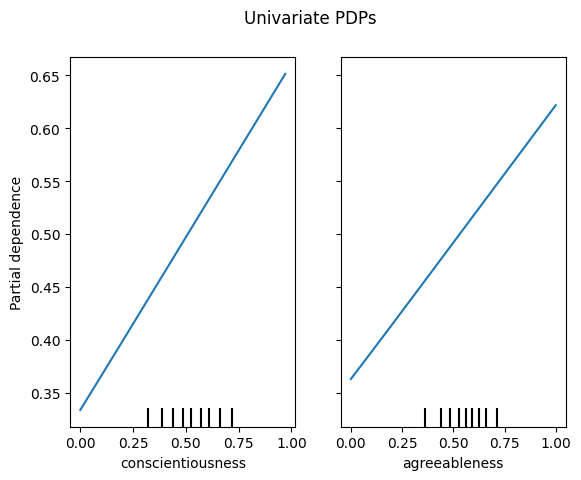

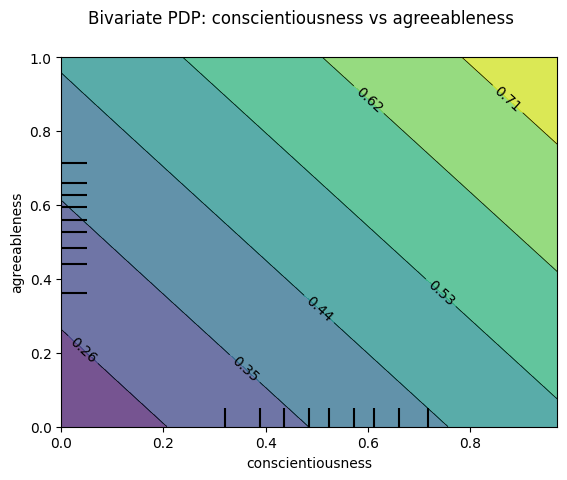

In [28]:
from sklearn.inspection import PartialDependenceDisplay

# PDPs

# Univariate

PartialDependenceDisplay.from_estimator(nn_model, train_features, ['conscientiousness', 'agreeableness'])
plt.suptitle("Univariate PDPs")
plt.show()

# Bivariate 

PartialDependenceDisplay.from_estimator(nn_model, train_features, [('conscientiousness', 'agreeableness')])
plt.suptitle("Bivariate PDP: conscientiousness vs agreeableness")
plt.show()



**Q3.4**

What do these plots show?

> Answer:
The plots show straight lines for both the univariate and bivariate PDPs, which can be explained by the use of a single hidden layer in the neural network, leading to limited nonlinearity.

**Q3.5**

Now generate ICE plots for each feature.

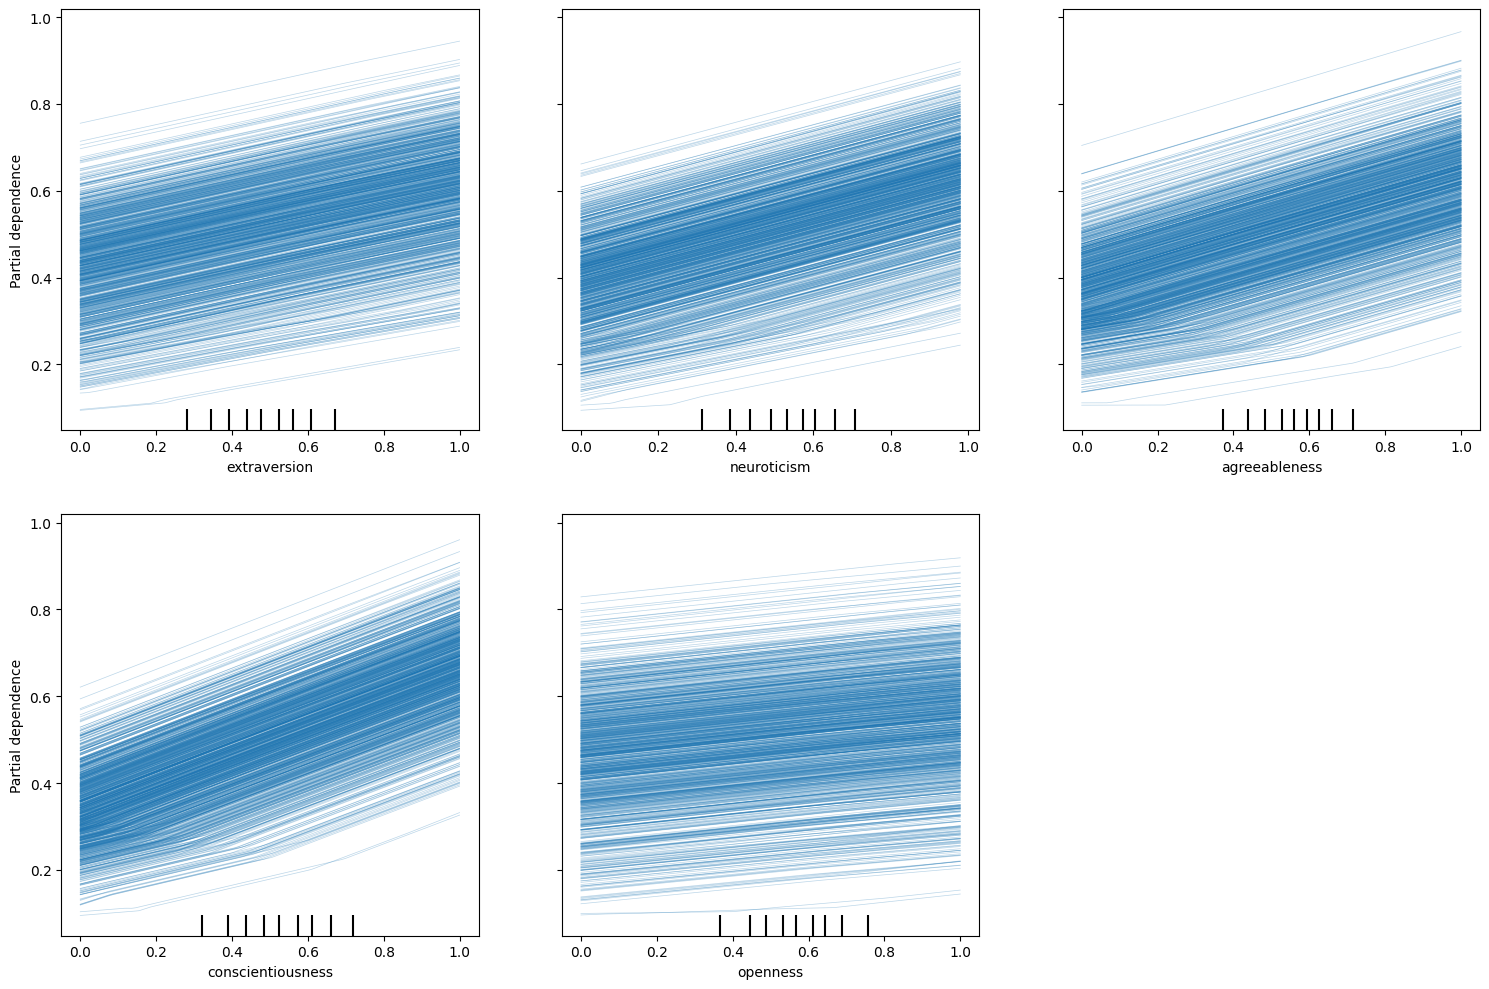

In [13]:
# ICEs
features = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']

# Plot ICE for each feature
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    nn_model,
    train_total,
    features=features,
    kind="individual",  # This is for ICE
    ax=ax
)
plt.tight_layout()
plt.show()

**Q3.6**

What can you conclude from ICE plots above?

> Answer:
The ICE plots indicate that most features influence the model’s predictions in a fairly linear and consistent way. However, conscientiousness and agreeableness show a slightly steeper upward trend, suggesting their higher values have a stronger positive effect on the outcome. Openness displays more variation across individuals, implying a somewhat more variable influence. 

**Q3.7**

Implement the PDF (Partial Dependence Function) for univariate analysis of the trained NN model.


In [14]:
def PDF(X, model, feature):
  """
  Input   Dataset 'X', Model 'model', feature_name 'feature'
  Output  x_values: independent variable values
          f_values: corresponding output per x value
  """
  # Note: uncomment the lines below and complete the right hand side (where you see '..' to set them to suitable values, respective explanations are provided for each variable
  num_samples = 100  # set the number of samples/steps to slice the range of the continuous feature, e.g., 100.
  min_val = X[feature].min()      # minimum value of the given feature
  max_val = X[feature].max()      # maximum value of the given feature
  step_size = (max_val - min_val) / (num_samples - 1)   # see the algorithm in corresponsing lecture slides to calculate the step size as a function of the above variables
  x_values = np.linspace(min_val, max_val, num_samples - 1)  # x_values at which we will calculate the partial function of the given feature
  f_values = []    # the calculated partial function values corresponding to x_values

  for k in range(num_samples - 1):
      X_tempory = X.copy()
      X_tempory[feature] = k  
      preds = model.predict(X_tempory)  
      f_values.append(np.mean(preds))

  return x_values, f_values

**Q3.8**

Calculate and visualize the feature importances obtained by your PDF algorithm with a bar graph. How do we calculate the feature importance given the x_values and y_values of the PDF algorithm?

In [15]:
# First calculate the x_values and f_values for each feature
features = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']
importances = []

for feature in features:
    x_vals, f_vals = PDF(test_features, nn_model, feature)
    importance = np.max(f_vals) - np.min(f_vals)  # range as importance
    importances.append(importance)



In [16]:
from scipy.stats import linregress

# Fit a linear model per feature, what is the output of this linear model?

features = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']

for feature in features:
    x_vals, f_vals = PDF(test_features, nn_model, feature)  # get partial dependence data
    slope, intercept, r_value, p_value, std_err = linregress(x_vals, f_vals)
    print(f"Feature: {feature}")
    print(f"  Slope: {slope:.4f}")
    print(f"  Intercept: {intercept:.4f}")
    print(f"  R-squared: {r_value**2:.4f}")
    print(f"  P-value: {p_value:.4e}")
    print(f"  Std error: {std_err:.4f}\n")

Feature: extraversion
  Slope: 19.9124
  Intercept: 0.2309
  R-squared: 1.0000
  P-value: 0.0000e+00
  Std error: 0.0002

Feature: neuroticism
  Slope: 19.8346
  Intercept: 0.3122
  R-squared: 1.0000
  P-value: 7.8223e-240
  Std error: 0.0071

Feature: agreeableness
  Slope: 27.4208
  Intercept: -2.5636
  R-squared: 1.0000
  P-value: 9.2108e-268
  Std error: 0.0050

Feature: conscientiousness
  Slope: 31.2562
  Intercept: -2.2945
  R-squared: 1.0000
  P-value: 5.1906e-271
  Std error: 0.0053

Feature: openness
  Slope: 9.4895
  Intercept: -0.5148
  R-squared: 1.0000
  P-value: 1.3962e-274
  Std error: 0.0015



**Q3.9**

What are the two most important features obtained by the PDF algorithm for the MLP model? How do these two features compare to the top two features from the Linear Model and the EBM?

> Answer:


### **4. Permutation Feature Importance**

**Q4.1**

Implement the permutation feature importance algorithm using RMSE as the error function. No existing libraries (barring the RMSE from `sklearn` and a function for random sampling / permutation) are allowed to be used, you will implement it yourself with the framework below.

In [17]:
def PFI(X, labels, model, base_rmse):
  results = []

  for feature in X.columns:
        X_permuted = X.copy()
        X_permuted[feature] = np.random.permutation(X_permuted[feature])  # shuffle the feature

        preds = model.predict(X_permuted)
        mse = mean_squared_error(labels, preds)
        rmse = np.sqrt(mse)  # manually compute RMSE
        score = rmse - base_rmse  # how much worse did the model get?

        results.append((feature, score))

  results_df = pd.DataFrame(results, columns=['Feature', 'Importance'])
  results_df = results_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

  return results_df


**Q4.2**

Visualize the feature importances obtained by your PFI algorithm with a bar graph.

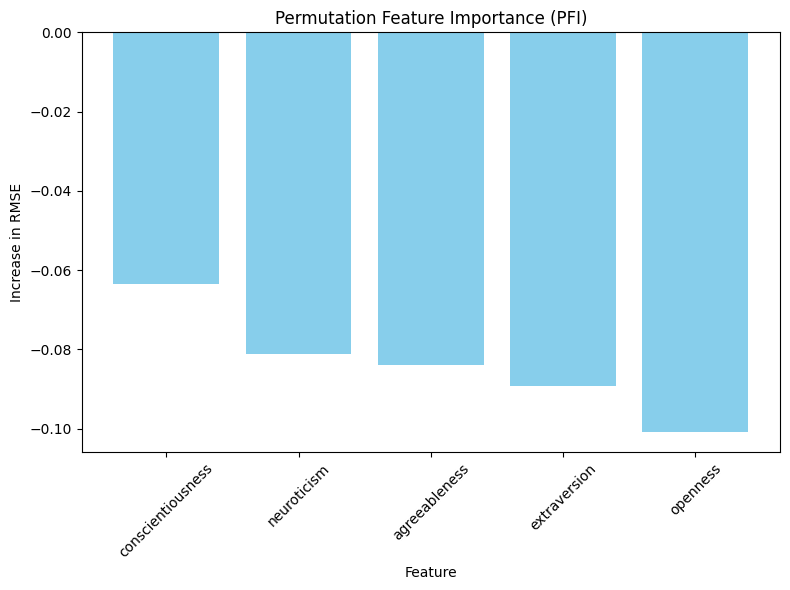

In [18]:
from sklearn.metrics import mean_squared_error

base_preds = model.predict(train_total)
mse = mean_squared_error(train_total_labels, base_preds)
base_rmse = np.sqrt(mse)

results_df = PFI(train_total, train_total_labels, nn_model, base_rmse)

def plot_pfi(results_df):
    plt.figure(figsize=(8, 6))
    plt.bar(results_df["Feature"], results_df["Importance"], color='skyblue')
    plt.xlabel("Feature")
    plt.ylabel("Increase in RMSE")
    plt.title("Permutation Feature Importance (PFI)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_pfi(results_df)

**Q4.3**

What are the two most important features obtained by the permutation feature importance algorithm for the MLP model? How do these two features compare to the top two features from the Linear Model and the EBM?

> Answer:
The two most important features identified by the permutation feature importance algorithm for the MLP model are conscientiousness and neuroticism, which align with the top features found by the EBM model. However, in the Linear model, agreeableness replaces neuroticism as one of the top features.